# About the notebook

The main goal of this notebook is to create descriptive statistics and perform exploratory data analysis

# About the data

- treatment (trt)
    - 0: placebo treatment
    - 1: active treatment
- age (years)
- gender
    - 0: male
    - 1: female
- visit
    - four monthly visits
- value
    - respiratory status
    - 0: good
    - 1: poor

### Import the data

In [149]:
source("./codesnippet_r/final_proj_config.R")

Parsed with column specification:
cols(
  patient = col_integer(),
  treatment = col_integer(),
  gender = col_integer(),
  age = col_integer(),
  visit1 = col_integer(),
  visit2 = col_integer(),
  visit3 = col_integer(),
  visit4 = col_integer()
)


### quick look of the dataset
lets look at the raw dataset and transformed dataset for each analysis

In [77]:
### raw dataset
head(dat_raw)

patient,trt,gender,age,visit1,visit2,visit3,visit4
1,0,0,28,1,1,1,1
2,0,1,19,1,1,1,1
3,0,0,15,0,1,1,1
4,0,0,63,1,1,1,1
5,0,1,35,1,1,1,1
6,0,1,13,1,1,1,1


In [80]:
### labeled dataset ---> for descriptive analysis
head(dat_lab)

patient,trt,gender,age,visit1,visit2,visit3,visit4
1,placebo,male,28,bad,bad,bad,bad
2,placebo,female,19,bad,bad,bad,bad
3,placebo,male,15,good,bad,bad,bad
4,placebo,male,63,bad,bad,bad,bad
5,placebo,female,35,bad,bad,bad,bad
6,placebo,female,13,bad,bad,bad,bad


In [81]:
### grouped data on visit one only ---> for analysis 01
head(dat_v1)

trt,age,gender,y,n
0,13,0,4,7
0,13,1,10,12
0,14,0,5,7
0,14,1,4,4
0,15,0,2,3
0,19,0,3,6


In [82]:
### grouped data on visit four only ---> for analysis 02
head(dat_v4)

trt,age,gender,y,n
0,13,0,6,7
0,13,1,10,12
0,14,0,5,7
0,14,1,3,4
0,15,0,2,3
0,19,0,6,6


In [83]:
### long data format of visit 1~4 ---> for analysis 03
head(dat_clust)

patient,trt,gender,age,visit,value
1,0,0,28,1,1
2,0,1,19,1,1
3,0,0,15,1,0
4,0,0,63,1,1
5,0,1,35,1,1
6,0,1,13,1,1


# Descriptive analysis

create demographic table for descriptive analysis

In [86]:
### categorical variables
catvars = c("trt", "gender", "visit1", "visit2", "visit3", "visit4")

### all variables
vars    = c("age", catvars)

### create demographic table for descriptive analysis
tableOne <- CreateTableOne(data = dat_lab, vars = vars, factorVars = catvars)
print(tableOne,
      contDigits = 1,
      varLabels  = TRUE,
      explain    = TRUE,
      showAllLevels = TRUE)

                 
                  level   Overall     
  n                        500        
  Age (mean (sd))         30.1 (10.9) 
  Treatment (%)   placebo  264 (52.8) 
                  active   236 (47.2) 
  Gender (%)      male     318 (63.6) 
                  female   182 (36.4) 
  visit1 (%)      good      63 (12.6) 
                  bad      437 (87.4) 
  visit2 (%)      good      71 (14.2) 
                  bad      429 (85.8) 
  visit3 (%)      good      88 (17.6) 
                  bad      412 (82.4) 
  visit4 (%)      good     100 (20.0) 
                  bad      400 (80.0) 


# Exploratory data analysis

Observation:
- in the active treatment
    - the active treatment seems to work well in lower age and higher age

- in the active treatment
    - the active treatment seems to work well in lower age (10~20), middle age (30~40) and higher age (50~70), but not very effective for age around (20~30)
    - the observation above may be due to the bin size of the age (simil)

Check the balance of the data

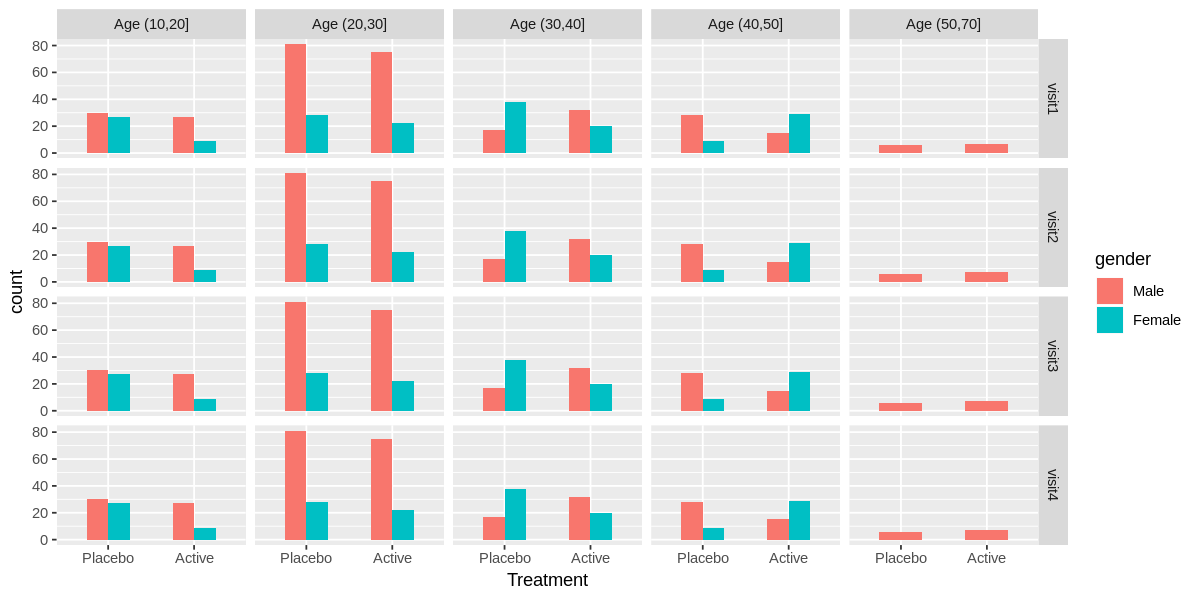

In [165]:
### cut age
df = dat_clust_lab
#df$age = df$age %>% cut(., breaks = seq(0, 70, by = 10)) %>% paste("Age", .)
df$age = df$age %>% cut(., breaks = c(10, 20, 30, 40, 50, 70)) %>% paste("Age", .)

### grouping and count
df = df %>% group_by(trt, age, gender, visit) %>% summarize(count = n())

### visualization
gp = ggplot(df, aes(x = trt, y = count, fill = gender)) + 
    facet_grid(visit~age) + 
    geom_bar(stat="identity", width=.5, position = "dodge") +
    labs(x = "Treatment")

options(repr.plot.height = 5, repr.plot.width = 10)
print(gp)

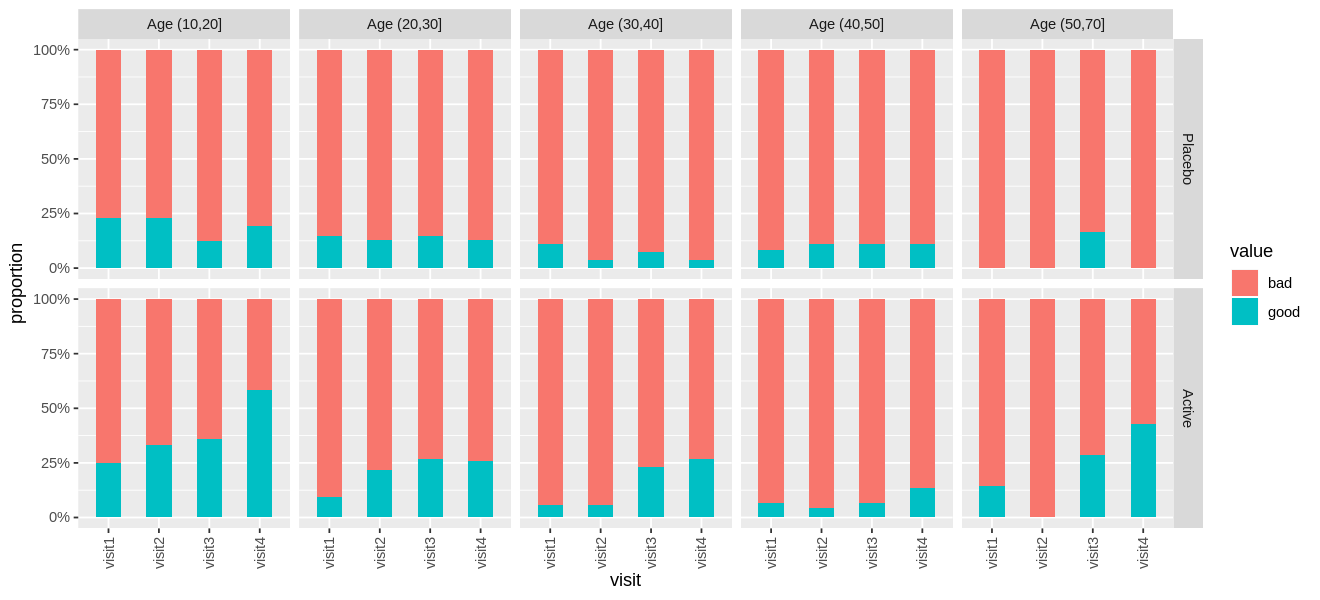

In [164]:
### categorized age and set levels
df = dat_clust_lab
#df$age = df$age %>% cut(., breaks = seq(0, 70, by = 10)) %>% paste("Age", .)
df$age = df$age %>% cut(., breaks = c(10, 20, 30, 40, 50, 70)) %>% paste("Age", .)

### count and calculate the proportion of respiratory status
df = df %>% group_by(trt, age, visit, value) %>% summarize(count = n())
df = df %>% group_by(trt, age, visit)        %>% mutate(proportion = count / sum(count))

### 

gp = ggplot(df, aes(x = visit, y = proportion, fill = value)) + 
    facet_grid(trt~age) + 
    geom_bar(stat="identity", width=.5) + 
    scale_y_continuous(labels = percent_format()) +
    theme(axis.text.x = element_text(vjust = 0.5, angle = 90))


options(repr.plot.height = 5, repr.plot.width = 11)
print(gp)